<a href="https://colab.research.google.com/github/Nicolieolieolie/Project/blob/main/CorrectingTitrationData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---
## Solving the Correction Issue
---

Hello! Thank you for using this code to correct your titration data. This code will help correct an infinite number of user input files of titration data (.txt files) and save them as .txt files, which is the preferred method of the program we use for analyzing data.

Before we get started, let's review some helpful reminders to ensure a smooth data correction process. Firstly, please make sure all of your .txt files are placed in your Google Drive in one folder. It's important to know where this folder is located, so it might be helpful to follow this format: /content/drive/My Drive/Titrator. To check if you've found the right folder, you can mount the drive first and click the blue text.

For organization purposes, a new folder titled "Original Files from the Titrator" will be generated with your original files.

Finally, this code asks for the slope-intercept formula, which should come from the calibration method listed in the lab notebook. If you have any issues with this, please don't hesitate to contact me.

Thank you for using this code, and happy data correcting! If you have any questions or concerns, please contact me.



In [ ]:
import os
import shutil
from google.colab import drive

drive.mount('/content/drive')

folder_path = input("What folder are your titration files located in?")

m = float(input("Please enter the slope generated after calibration "))
b = float(input("Please enter the y-intercept generated after calibration "))


Mounted at /content/drive
What folder are your titration files located in?/content/drive/My Drive/Titrator
Please enter the slope generated after calibration 2
Please enter the y-intercept generated after calibration 3


In [ ]:
original_folder = os.path.join(folder_path, "Original Files from the Titrator")
os.makedirs(original_folder, exist_ok=True)


for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path, filename)
        original_file_path = os.path.join(original_folder, filename)
        shutil.copyfile(file_path, original_file_path)

        with open(file_path, "r", encoding='latin-1') as file:
            lines = file.readlines()

        should_update = False
        for i, line in enumerate(lines):
            if "$S Mode 1" in line:
                should_update = True
            elif "$E" in line:
                should_update = False
            elif should_update:
                line_parts = line.split()
                if len(line_parts) >= 3:
                    try:
                        float(line_parts[2])
                        new_value = m * float(line_parts[2]) + b 
                        line_parts[2] = '%.3f' % new_value 
                        lines[i] = "\t".join(line_parts) + "\n" 
                    except ValueError:
                        print("")
                        continue

        corrected_file_path = os.path.join(folder_path, filename[:-4] + "_corrected.txt")
        with open(corrected_file_path, "w", encoding='latin-1', newline='\r\n') as file:
            file.writelines(lines)
        shutil.move(file_path, original_file_path)


print("Give it a minute to correct your files... the more files the longer it will take. :)")


Your corrected files are completed :)


#Thank you for using my code! 
If you have any questions at all please feel free to contact me!
---
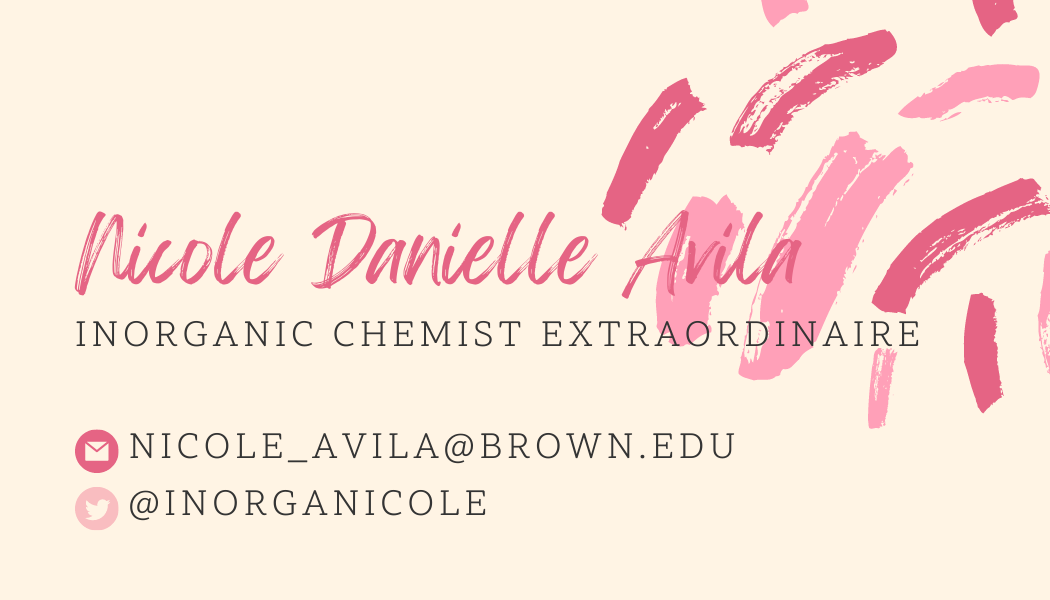